<a href="https://colab.research.google.com/github/YuriSales01/Projeto_Integrador_Ciencia_de_Dados/blob/main/Projeto_Ciencia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Integrador: Análise de Dados | Incidentes Aéreos Brasil (2010-2019)

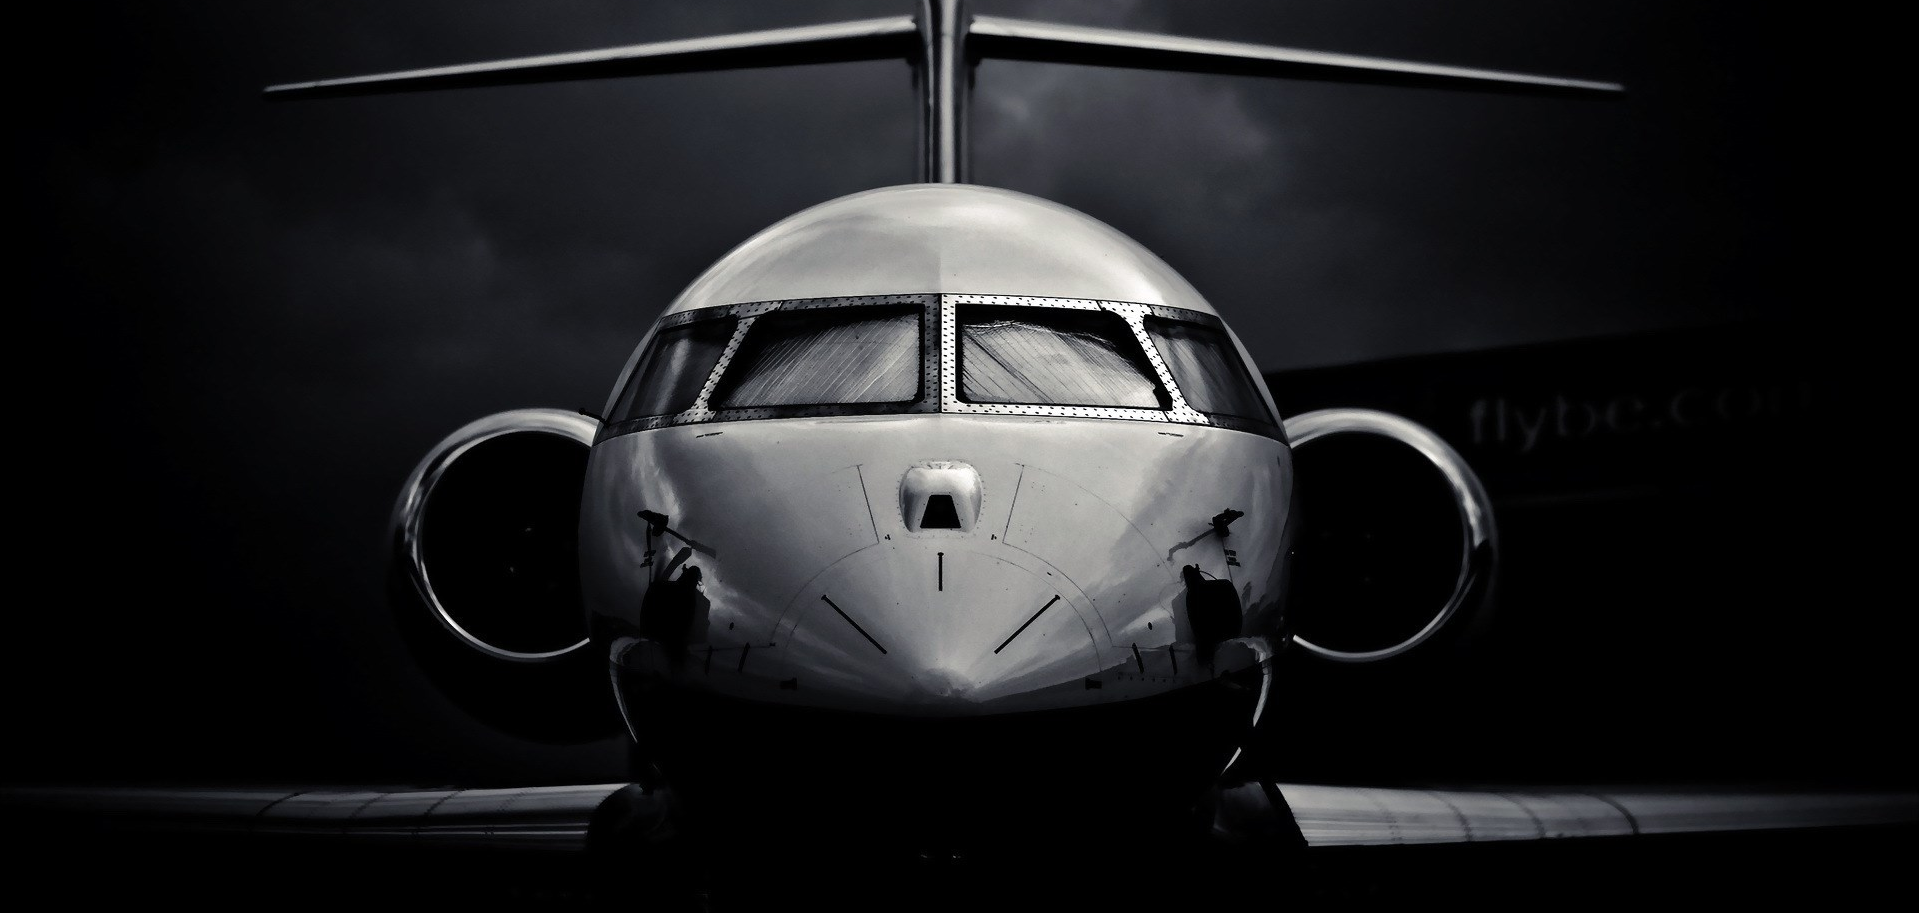

##Bibliotecas

In [ ]:
# instalar o pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 565 kB 5.3 MB/s 


In [ ]:
 # Bibliotecas
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.express as px
from collections import Counter
import statistics as static
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns
import random
import datetime as dt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import statistics as static
%matplotlib inline

# instalar o pywaffle
!pip install pywaffle -q

**Pandas** 

É uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados com poucos comandos, ela oferece estruturas e operações para manipular tabelas numéricas e séries temporais.


**NumPy**

Significa Numerical Python, fornece um grande conjunto de funções e operações de bibliotecas que ajudam os programadores a executar facilmente cálculos numéricos e consiste em objetos chamados de arrays (matrizes), que são multidimensionais. 


**Matplotlib.Pyplot**

É utilizada para visualização de dados, plotagem gráfica e pela extensão de matemática numérica. Seu objetivo é ser uma alternativa viável de código aberto e plataforma cruzada de programação projetada especificamente para engenheiros e cientistas de dados, para analisar e projetar sistemas e produtos. 


**Pyplot** 

É um módulo no pacote matplotlib, que fornece uma interface e permite a criação implícita e automática de figuras e eixos para atingir o gráfico desejado.


**Seaborn**

O Seaborn ajuda a visualização incrível para plotagem de gráficos estatísticos, ele é construído na parte superior da biblioteca matplotlib e também está intimamente integrado às estruturas de dados dos pandas.


**SciPy.Stats**

É um módulo que contém muitas distribuições de probabilidade e uma biblioteca crescente de funções estatísticas, especialmente para o estudo da função de probabilidade.


**Plotly.Express**

Esta função é usada para criar um gráfico de linha. Ele também pode ser criado usando o DataFrame do pandas, onde cada linha de DataFrame é representada como vértice de uma marca de polilinha no espaço 2D.


**Collections**

São basicamente tipos de dados de contêineres, ou seja, listas, conjuntos, tuplas e dicionário. Eles têm características diferentes com base na declaração e no uso. É um conjunto bem definido de interfaces e classes para representar e tratar grupos de dados como uma única unidade, sendo uma coleção onde os elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário. As contagens são permitidas para qualquer valor inteiro, incluindo zero ou negativo.


**Statistics**

Esta biblioteca contém múltiplas funções matemáticas que podem ser utilizadas de forma simples. Uma vez que queremos calcular a média da lista dada.


**PyWaffle**

É um pacote Python de código aberto para fazer gráfico de waffles, bases em Matplotlib


**Random**

É uma biblioteca de funções, que tem geradores de números pseudoaleatórios. Para usarmos essa biblioteca temos de importá-la, ou seja, colocaremos IMPORT Random. Estudaremos a função Rand INT. Ela serve para solucionar, de forma aleatória, um número inteiro, dentro de valores passados pelo usuário.


**Datetime**

Permite trabalhar com data e hora de forma eficiente, considerando os diferentes formatos de datas, fusos horários e o grande complicador: o horário de verão.


**WordCloud**

As Word Clouds também conhecidas como wordle, word collage ou tag cloud, são representações visuais de palavras que dão maior destaque às palavras que aparecem com mais frequência.

##Base de Dados Google Drive 

Realização da autorização através do login no google drive para utilização da base de dados a ser análisada.

In [ ]:

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
spreasheet = gc.open('ocorrencias_cenipa')
page = spreasheet.sheet1

##Análise Exploratória do Dataset



*   Nesta etapa vamos entender como os dados estão estruturados e identificar os padrões que compoem o dataset. Precisamos também fazer algumas validações básicas como: verificar se há duplicidade de registros, a consistência dos dados e avaliar o tipo de distribuição das variáveis.


In [ ]:
# Verificando os valores e campos que compoem o Dataset.
page.row_values(1)

['codigo',
 'tipo',
 'descricao',
 'cidade',
 'estado',
 'data',
 'ano',
 'hora',
 'aeronave_liberada',
 'status_investigacao',
 'aeronaves_envolvidas',
 'ocorrencia_saida_pista',
 'aeronave_tipo',
 'aeronave_fabricante',
 'motor_tipo',
 'aeronave_motor_quantidade',
 'aeronave_assentos',
 'aeronave_ano_fabricacao',
 'aeronave_pais_fabricante',
 'aeronave_fase_operacao',
 'aeronave_nivel_dano']

In [ ]:
# Criando DataFrame da base de dados
acidentes = pd.DataFrame(page.get_all_records())

In [ ]:
#Informações do Dataset
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo                     5242 non-null   int64 
 1   tipo                       5242 non-null   object
 2   descricao                  5242 non-null   object
 3   cidade                     5242 non-null   object
 4   estado                     5242 non-null   object
 5   data                       5242 non-null   object
 6   ano                        5242 non-null   int64 
 7   hora                       5242 non-null   object
 8   aeronave_liberada          5242 non-null   object
 9   status_investigacao        5242 non-null   object
 10  aeronaves_envolvidas       5242 non-null   int64 
 11  ocorrencia_saida_pista     5242 non-null   object
 12  aeronave_tipo              5242 non-null   object
 13  aeronave_fabricante        5242 non-null   object
 14  motor_ti

In [ ]:
# Verficar se há linhas duplicadas, se sim ele retorna o valor como "true"
acidentes.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5237    False
5238    False
5239    False
5240    False
5241    False
Length: 5242, dtype: bool

In [ ]:
# Quantidade de valores unicos em cada coluna
acidentes.nunique()

codigo                       5242
tipo                            3
descricao                      75
cidade                       1042
estado                         27
data                         2697
ano                            10
hora                          921
aeronave_liberada               3
status_investigacao             3
aeronaves_envolvidas            3
ocorrencia_saida_pista          2
aeronave_tipo                  10
aeronave_fabricante           223
motor_tipo                      6
aeronave_motor_quantidade       6
aeronave_assentos              87
aeronave_ano_fabricacao        79
aeronave_pais_fabricante       20
aeronave_fase_operacao         32
aeronave_nivel_dano             5
dtype: int64

In [ ]:
#visualizando o cabeçalho do dataset

acidentes.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


##1. Quantas variáveis e quantos registros o nosso conjunto de dados possui? 

Vamos identificar a quantidade de entradas que nosso conjunto de dados possui.

In [ ]:
# identificar os seguintes pontos: volume de dados, quantidade de variáveis, quantidade distinta de imóveis, se há duplicidade de registros e se há duplicidade nos campos chave;
print("Linhas: {}".format(acidentes.shape[0]))
print("Colunas: {}\n".format(acidentes.shape[1]))
print("Quantidade distinta de aeronaves: {}".format(len(acidentes['aeronave_tipo'].unique().tolist())))
print("Registros duplicados: {}".format(acidentes.duplicated().sum()))
print("Campo chave duplicado:{}".format(acidentes[['codigo']].duplicated().sum()))

Linhas: 5242
Colunas: 21

Quantidade distinta de aeronaves: 10
Registros duplicados: 0
Campo chave duplicado:0


##2. Qual a porcentagem de valores ausentes no dataset? 

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
# verificando dados ausentes
(acidentes.isnull().sum()).sort_values(ascending=False)

codigo                       0
ocorrencia_saida_pista       0
aeronave_fase_operacao       0
aeronave_pais_fabricante     0
aeronave_ano_fabricacao      0
aeronave_assentos            0
aeronave_motor_quantidade    0
motor_tipo                   0
aeronave_fabricante          0
aeronave_tipo                0
aeronaves_envolvidas         0
tipo                         0
status_investigacao          0
aeronave_liberada            0
hora                         0
ano                          0
data                         0
estado                       0
cidade                       0
descricao                    0
aeronave_nivel_dano          0
dtype: int64

É posssível notar que os campos do dataset não existem valores nulos, podendo assim afirmar que a qualidade do dataset é ideal para realizar análises

##3. Há outliers presentes? 

Analisando o DataSet existem outliers que podem prejudicar as análises?
Vamos descobrir.

In [ ]:
# verificando a distribuição estatística
acidentes.describe().round(1)

,codigo,ano,aeronaves_envolvidas,aeronave_assentos,aeronave_ano_fabricacao
count,5242.0,5242.0,5242.0,5242.0,5242.0
mean,56472.5,2014.2,1.0,27.6,1863.3
std,13045.6,2.8,0.1,54.5,507.1
min,39115.0,2010.0,1.0,0.0,0.0
25%,46024.5,2012.0,1.0,2.0,1978.0
50%,51693.5,2014.0,1.0,6.0,1992.0
75%,66450.8,2017.0,1.0,10.0,2007.0
max,79227.0,2019.0,3.0,384.0,9999.0


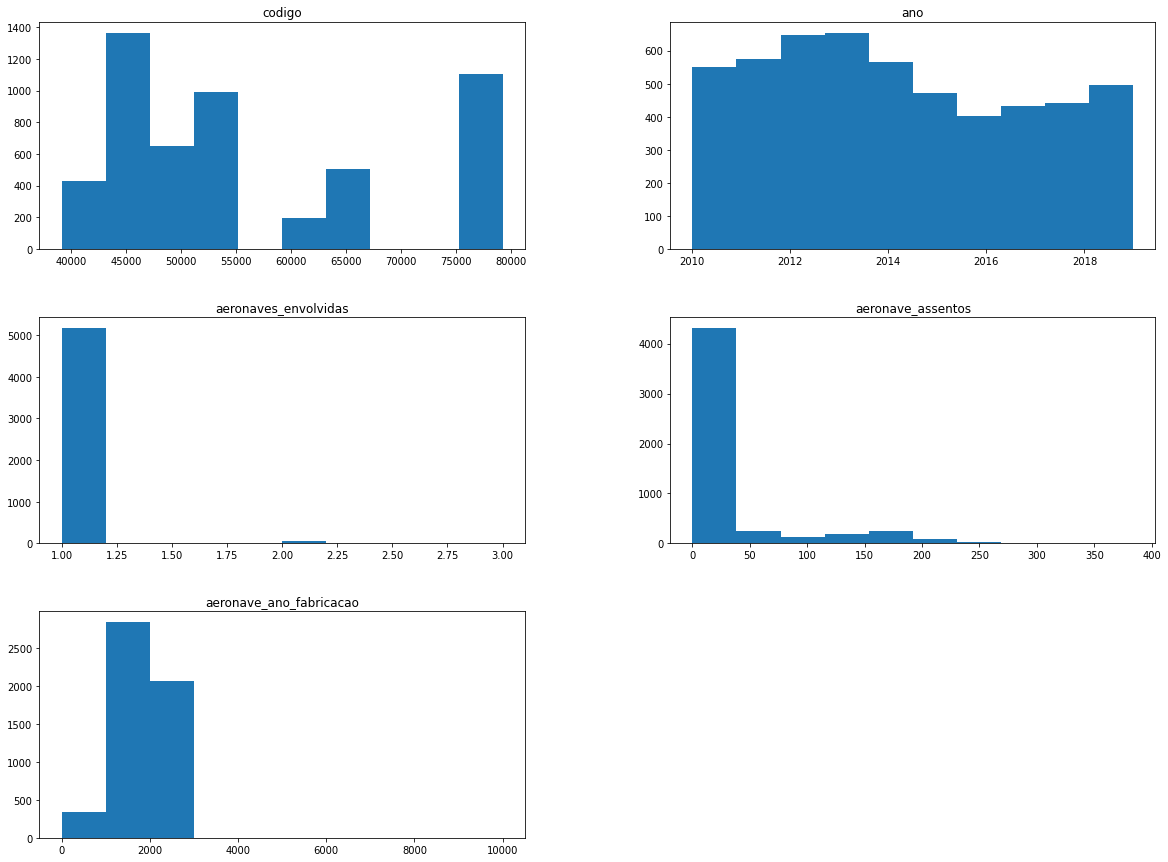

In [ ]:
# verificando as distribuições
acidentes.hist(figsize=(20,15), grid=False);

##4. Qual a correlação existente entre as variáveis? 

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [ ]:
# criar uma matriz de correlação
corr = acidentes[['aeronaves_envolvidas','aeronave_assentos','aeronave_ano_fabricacao','ano']].corr()

# mostrar a matriz de correlação
display(corr)

,aeronaves_envolvidas,aeronave_assentos,aeronave_ano_fabricacao,ano
aeronaves_envolvidas,1.000000,-0.006982,-0.025948,0.032272
aeronave_assentos,-0.006982,1.000000,0.023408,-0.024765
aeronave_ano_fabricacao,-0.025948,0.023408,1.000000,-0.171178
ano,0.032272,-0.024765,-0.171178,1.000000


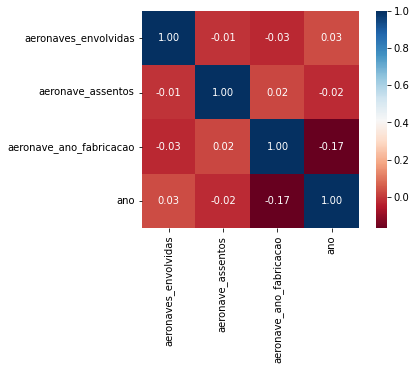

In [ ]:
# plotando um mapa de calor a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Analisando as correlações acima é possível afirmar que as variáveis não possuem correlações fortes, o que nos permite evitar com que o modelo de regressão não entre em variáveis com fortes correlações.


#Resultados - Análise Exploratória do Dataset

*   Foi feita apenas uma análise superficial na base de dados, porém já se percebeu que não existem muito Outliers ou percentual preocupante de dados nulos. 

*   Também notamos que existe uma correlação em algumas variáveis do Dataset, onde vamos aprofundar as análises nos próximos tópicos

*   Por fim, lembra-se que esta é uma análise inicial resumida do Dataset podendo assim saber quais são os possíveis problemas ou divergências que podemos encontrar ao analisar o Dataset total.






#Análise dos Dados e Insights

Finalizada a análise explaratória dos dados, agora vamos começar a analisar os dados da base de "Ocorrências_Cenipa (2010-2019).

In [ ]:
#Plotando número nos Gráficos em Barras Horizontais
def rotulo_linhas(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

#Análises por Regiões x Tipos de Ocorrências

In [ ]:
#divindo as ocorrências por região
dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
tipos = ['ACIDENTE', 'INCIDENTE','INCIDENTE GRAVE']
dic_01 = {i: [ len([k for k in list(acidentes.loc[acidentes['tipo'] == i, ['estado']]['estado'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in tipos}

dic_01['Região'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)

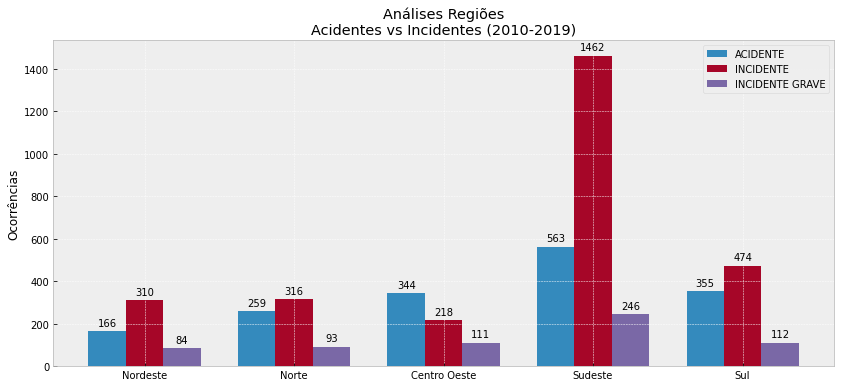

In [ ]:
#Visualizando a primeira análise por região em um gráfico de barras horizontais
plt.style.use("bmh")
fig, ax = plt.subplots(figsize=(14, 6))
plt.grid(True,color='white')

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1]
r3 = [ x + width for x in r2]

rects1 = ax.bar(r1, dados_regioes['ACIDENTE'], width, label='ACIDENTE')
rects2 = ax.bar(r2, dados_regioes['INCIDENTE'], width, label='INCIDENTE')
rects3 = ax.bar(r3, dados_regioes['INCIDENTE GRAVE'], width, label='INCIDENTE GRAVE')

ax.set_ylabel('Ocorrências')
ax.set_title('Análises Regiões\nAcidentes vs Incidentes (2010-2019)')
ax.set_xticks(r2)
ax.set_xticklabels(dados_regioes['Região'])
ax.legend()

rotulo_linhas(rects1, ax)
rotulo_linhas(rects2, ax)
rotulo_linhas(rects3, ax)

plt.show()

É possível notar na análise acima que a grande maioria dos incidentes aéreos se concentram na região **Sudeste** com o maior número em incidentes seguidos por acidentes, o alto volume de incidentes se justifica por conta da grande quantidade de voos neste região.

 A região **Sul** vem em seguida, porém com um número bem menor de incidentes aéreos registrados.

 A região **Centro Oeste** foi a região com menos incidentes aéreos registrados neste período.

#Análise de ocorrência por estado

In [ ]:
estado = Counter(acidentes['estado'])
fase_estado = sorted(estado, key = estado.get, reverse = True)
contador_estado = sorted(list(estado.values()), reverse = True)

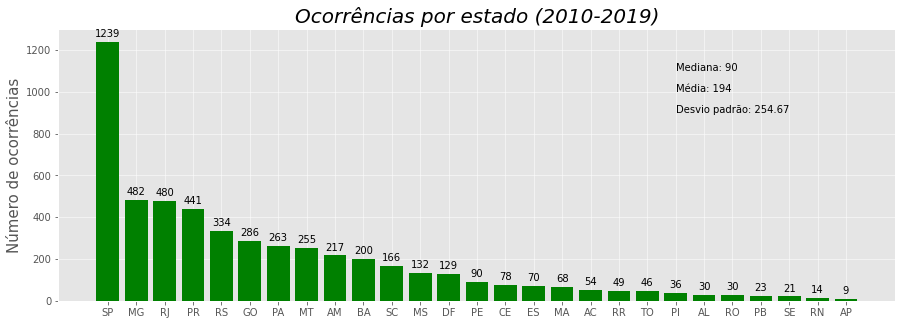

In [ ]:
plt.style.use("ggplot")

fig,ax = plt.subplots(figsize=(15,5))

x=fase_estado
y=contador_estado

rects1=ax.bar(x, y,color='g')

ax.set_xticks(x)
plt.title('Ocorrências por estado (2010-2019)',style='italic', size=20) 
plt.ylabel("Número de ocorrências", size=15)
plt.text(20, 1000.9, 'Média: %d'%(np.mean(np.array(contador_estado))),size=10) 
plt.text(20, 1100.9, 'Mediana: %d'%(np.median(np.array(contador_estado))),size=10)
plt.text(20, 900.8, 'Desvio padrão: %.2f'%(static.stdev(contador_estado)),size=10)  

plt.grid(True,color='white') 
rotulo_linhas(rects1, ax)
plt.show()

É possível notar que `SP` foi o estado com o maior numero de ocorrências neste periodo com **1239** casos, visto que, concentra maior parte dos voos comerciais, e grande volume de voos particulares.

O estado com menor quantidade de ocorrências foi o `AP`, com **9**, devido a baixa demanda de voos na região.

A média de ocorrência por estado ficou em 194 durante esse período. Quantidade elevada, devido a excessiva quantidade de ocorrências em São Paulo.

#Análise Ocorrências por cidade

In [ ]:
cidade = Counter(acidentes['cidade'])
fase_cidade = sorted(cidade, key = cidade.get, reverse = True)
contador_cidade = sorted(list(cidade.values()), reverse = True)

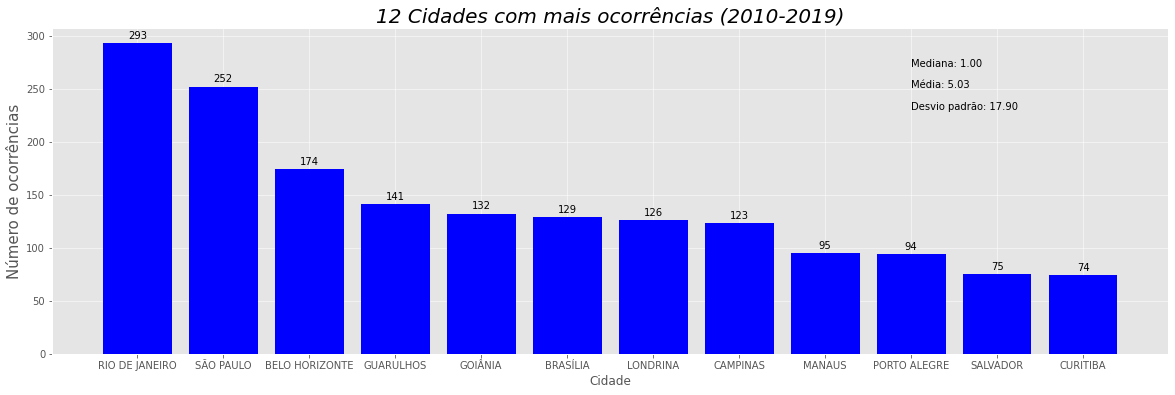

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(20,6))

x=fase_cidade[:12]
y=contador_cidade[:12]

rects1=ax.bar(x, y,color='b')

plt.xlabel('Cidade')
ax.set_xticks(x)
plt.ylabel("Número de ocorrências",size=15)
plt.title('12 Cidades com mais ocorrências (2010-2019)',size=20,style='italic')
plt.text(9, 270.9, 'Mediana: %.2f'%(np.median(np.array(contador_cidade))),size=10)
plt.text(9, 250.9, 'Média: %.2f'%(np.mean(np.array(contador_cidade))),size=10)
plt.text(9, 230.8, 'Desvio padrão: %.2f'%(static.stdev(contador_cidade)),size=10)   

plt.grid(True,color='white')
rotulo_linhas(rects1, ax)
plt.show()

A cidade com maior número de ocorrências nesse período foi `Rio de Janeiro` com **293**, pois além da alta demanda de voos comerciais e privados,a geografia do relevo não é muito favorável a aviação.

Dos **5568** municípios no Brasil, **1042** tiveram pelo menos 1 ocorrência aeronáutica e isso corresponde a **18,71%** das cidades brasileiras

A média de ocorrência por cidade ficou em **5.03** durante esse período

A porcentagem de ocorrências nas 10 primeiras cidades do gráfico corresponde a **29%** do total

#Análise por Nível de Dano

In [ ]:
aeronave_nivel_dano = Counter(acidentes['aeronave_nivel_dano'])
fase_aeronave_nivel_dano = sorted(aeronave_nivel_dano, key = aeronave_nivel_dano.get, reverse = True)
contador_aeronave_nivel_dano = sorted(list(aeronave_nivel_dano.values()), reverse = True)

In [ ]:
#NENHUM
danos_nenhum = list(set(acidentes['ano']))
danos = list(acidentes.loc[(acidentes['aeronave_nivel_dano']) == 'NENHUM', ['ano']]['ano'])
qtd_nenhum_ano = pd.DataFrame({'ano': danos_nenhum, 'NENHUM': [danos.count(i) for i in danos_nenhum]})
qtd_nenhum_ano = qtd_nenhum_ano.sort_values(['NENHUM'])
soma_nenhum= qtd_nenhum_ano['NENHUM'].sum()

In [ ]:
#LEVE
danos_leve = list(set(acidentes['ano']))
danos = list(acidentes.loc[(acidentes['aeronave_nivel_dano']) == 'LEVE', ['ano']]['ano'])
qtd_leve_ano = pd.DataFrame({'ano': danos_leve, 'LEVE': [danos.count(i) for i in danos_leve]})
qtd_leve_ano = qtd_leve_ano.sort_values(['LEVE'])
soma_leve= qtd_leve_ano['LEVE'].sum()

In [ ]:
#SUBSTANCIAL
danos_substancial = list(set(acidentes['ano']))
danos = list(acidentes.loc[(acidentes['aeronave_nivel_dano']) == 'SUBSTANCIAL', ['ano']]['ano'])
qtd_substancial_ano = pd.DataFrame({'ano': danos_substancial, 'SUBSTANCIAL': [danos.count(i) for i in danos_substancial]})
qtd_substancial_ano = qtd_substancial_ano.sort_values(['SUBSTANCIAL'])
soma_substancial= qtd_substancial_ano['SUBSTANCIAL'].sum()

In [ ]:
#DESTRUÍDA
danos_destruida = list(set(acidentes['ano']))
danos = list(acidentes.loc[(acidentes['aeronave_nivel_dano']) == 'DESTRUÍDA', ['ano']]['ano'])
qtd_destruida_ano = pd.DataFrame({'ano': danos_destruida, 'DESTRUÍDA': [danos.count(i) for i in danos_destruida]})
qtd_destruida_ano = qtd_destruida_ano.sort_values(['DESTRUÍDA'])
soma_destruida= qtd_destruida_ano['DESTRUÍDA'].sum()

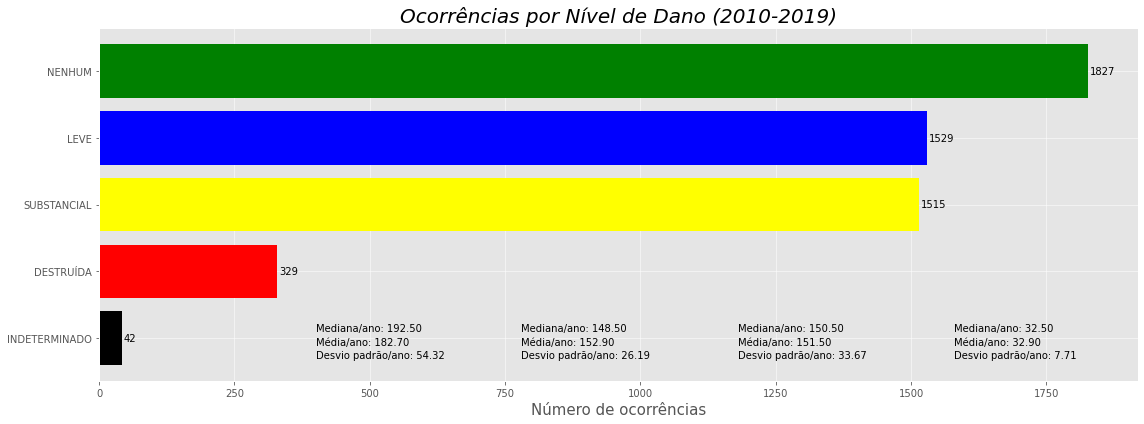

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(16, 6))

x=fase_aeronave_nivel_dano
y=contador_aeronave_nivel_dano

ax.barh(x, y, color=['g','blue','yellow','red','black'])

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências',size=15)

plt.title('Ocorrências por Nível de Dano (2010-2019)',size=20,style='italic')
plt.text(400, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_nenhum_ano['NENHUM']))),size=10)
plt.text(400, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_nenhum_ano['NENHUM']))),size=10)
plt.text(400, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_nenhum_ano['NENHUM'])),size=10)

plt.text(780, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_leve_ano['LEVE']))),size=10)
plt.text(780, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_leve_ano['LEVE']))),size=10)
plt.text(780, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_leve_ano['LEVE'])),size=10)

plt.text(1180, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_substancial_ano['SUBSTANCIAL']))),size=10)
plt.text(1180, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_substancial_ano['SUBSTANCIAL']))),size=10)
plt.text(1180, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_substancial_ano['SUBSTANCIAL'])),size=10)

plt.text(1580, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_destruida_ano['DESTRUÍDA']))),size=10)
plt.text(1580, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_destruida_ano['DESTRUÍDA']))),size=10)
plt.text(1580, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_destruida_ano['DESTRUÍDA'])),size=10)
plt.tight_layout(w_pad=4, h_pad=3)

Ao analisar o grafico é visto que a maior parte das ocorrências não gerou dano à aeronave,pois grande parte dos casos foram incidentes(“evento não planejado que tinha o potencial de levar a um acidente.”)

A menor parte das ocorrências no período, gerou danos indeterminados ou seja não foi possivel determinar as condições da aeronave

A média de casos sem danos foi de **182,70**/ano.

A média de casos com danos leves foi de **152,90**/ano.

A média de casos com danos substanciais foi de **151,50**/ano.

A média de casos que destruiram a aeronave foi de **32,90**/ano.

#Análise por Status da Investigação

In [ ]:
#FINALIZADA
status_finalizada= list(set(acidentes['ano']))
dados_status_finalizada = list(acidentes.loc[(acidentes['status_investigacao']) == 'FINALIZADA', ['ano']]['ano'])
qtd_status_finalizada_ano = pd.DataFrame({'ANO': status_finalizada, 'FINALIZADA': [dados_status_finalizada.count(i) for i in status_finalizada]})
qtd_status_finalizada_ano = qtd_status_finalizada_ano.sort_values(['FINALIZADA'])
soma_status_finalizada= qtd_status_finalizada_ano['FINALIZADA'].sum()

In [ ]:
#ATIVA
status_ativa= list(set(acidentes['ano']))
dados_status_ativa = list(acidentes.loc[(acidentes['status_investigacao']) == 'ATIVA', ['ano']]['ano'])
qtd_status_ativa_ano = pd.DataFrame({'ANO': status_ativa, 'ATIVA': [dados_status_ativa.count(i) for i in status_ativa]})
qtd_status_ativa_ano = qtd_status_ativa_ano.sort_values(['ATIVA'])
soma_status_ativa= qtd_status_ativa_ano['ATIVA'].sum()

In [ ]:
#INDETERMINADA
status_indeterminada= list(set(acidentes['ano']))
dados_status_indeterminada = list(acidentes.loc[(acidentes['status_investigacao']) == 'INDETERMINADA', ['ano']]['ano'])
qtd_status_indeterminada_ano = pd.DataFrame({'ANO': status_indeterminada, 'INDETERMINADA': [dados_status_indeterminada.count(i) for i in status_indeterminada]})
qtd_status_indeterminada_ano = qtd_status_indeterminada_ano.sort_values(['INDETERMINADA'])
soma_status_indeterminada= qtd_status_indeterminada_ano['INDETERMINADA'].sum()

In [ ]:
status_investigacao = Counter(acidentes['status_investigacao'])
fase_status_investigacao = sorted(status_investigacao, key = status_investigacao.get, reverse = True)
contador_status_investigacao = sorted(list(status_investigacao.values()), reverse = True)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:271: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  conv.to_rgba(color)


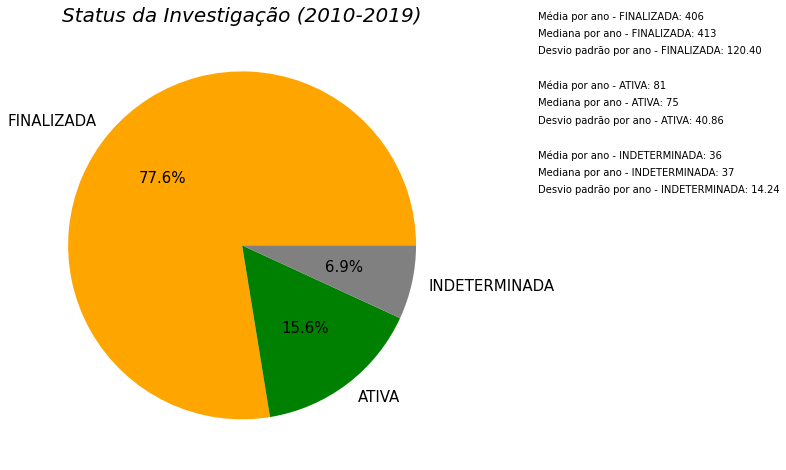

In [ ]:
plt.style.use("ggplot")

plt.title('Status da Investigação (2010-2019)',size=20,style='italic')

plt.text(1.7, 1.2, 'Mediana por ano - FINALIZADA: %d'%(np.median(np.array(qtd_status_finalizada_ano['FINALIZADA']))),size=10)
plt.text(1.7, 1.3, 'Média por ano - FINALIZADA: %d'%(np.mean(np.array(qtd_status_finalizada_ano['FINALIZADA']))),size=10)
plt.text(1.7, 1.1, 'Desvio padrão por ano - FINALIZADA: %.2f'%(static.stdev(qtd_status_finalizada_ano['FINALIZADA'])),size=10)

plt.text(1.7, 0.8, 'Mediana por ano - ATIVA: %d'%(np.median(np.array(qtd_status_ativa_ano['ATIVA']))),size=10)
plt.text(1.7, 0.9, 'Média por ano - ATIVA: %d'%(np.mean(np.array(qtd_status_ativa_ano['ATIVA']))),size=10)
plt.text(1.7, 0.7, 'Desvio padrão por ano - ATIVA: %.2f'%(static.stdev(qtd_status_ativa_ano['ATIVA'])),size=10)

plt.text(1.7, 0.4, 'Mediana por ano - INDETERMINADA: %d'%(np.median(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))),size=10)
plt.text(1.7, 0.5, 'Média por ano - INDETERMINADA: %d'%(np.mean(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))),size=10)
plt.text(1.7, 0.3, 'Desvio padrão por ano - INDETERMINADA: %.2f'%(static.stdev(qtd_status_indeterminada_ano['INDETERMINADA'])),size=10)

status = acidentes['status_investigacao'].value_counts().plot(kind='pie',
autopct='%1.1f%%',
label='',
figsize=(15,8),
colors = ( "orange", "G","grey"),
textprops = dict(color ="black",size=15))


Analisando o gráfico podemos notar que a maior parte das ocorrências teve sua investigação finalizada, representando **77,6%** na totalidade, e este resultado se dá pois a maior parte dos casos são de  baixa gravidade.

A menor parte das ocorrências teve sua investigação indeterminada, representando **6,9%** do total

A média dos casos finalizados foi de **413**/ano.

A média dos casos ativos foi de **81**/ano.

A média dos casos indeterminados foi de **36**/ano.

#Análise por tipo de Ocorrências#

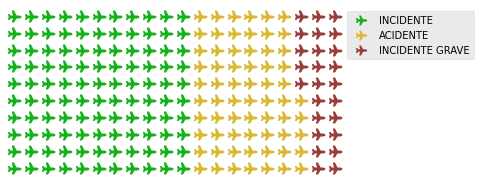


Representatividade - Tipo de Ocorrências

INCIDENTE          55.07
ACIDENTE           32.32
INCIDENTE GRAVE    12.61
Name: tipo, dtype: float64


In [ ]:
#Análise de representatividade dos tipos de ocorrências.
data = acidentes.tipo.value_counts().to_dict()

# plotando gráfico de waffle
 
fig = plt.figure(
                FigureClass=Waffle,
                rows=10,
                columns=20,
                colors=("#15B01A", "#DCB732", "#983D3D"),
                values=data, icons='plane', icon_size=12,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                         )
fig.set_tight_layout(False)

plt.show();

# mostrar a porcentagem de cada tipo de incidente na base
print('\nRepresentatividade - Tipo de Ocorrências\n')
percentual = round((acidentes.tipo.value_counts() / acidentes.shape[0])*100.,2)
print(percentual)







*   Podemos observar que na análise acima os `incidentes` menos graves são os maiores com uma representativade de **55,07%**. Seguidos dos acidentes com **32,32%** e os incidentes graves com **12,61%** do total. 

*   A análise acima está relacionada com a segurança do transporte aéreo, podendo afirmar que os maiores casos são apenas incidentes.




#Análise por Tipo de Aeronave#

In [ ]:
#lista das ocorrências por tipo de aeronave, contando a quantidade de ocorrências de cada uma
aeronave_tipo = Counter(acidentes['aeronave_tipo'])

#os tipos de aeronave individualmente, ordenados ascendemente
tipo = sorted(aeronave_tipo, key = aeronave_tipo.get, reverse = True)

#a quantidade de ocorrências, ordenados ascendemente
contador_tipo = sorted(list(aeronave_tipo.values()), reverse = True)

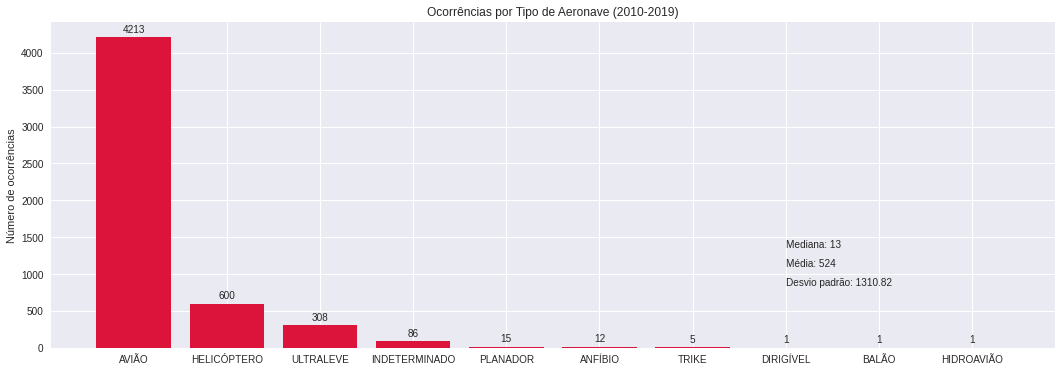


Representatividade - Tipo de Aeronaves

AVIÃO            80.37
HELICÓPTERO      11.45
ULTRALEVE         5.88
INDETERMINADO     1.64
PLANADOR          0.29
ANFÍBIO           0.23
TRIKE             0.10
DIRIGÍVEL         0.02
BALÃO             0.02
HIDROAVIÃO        0.02
Name: aeronave_tipo, dtype: float64


In [ ]:
# Visualizando a análise por tipo de aeronave em um gráfico de barra
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize=(18, 6))

x=tipo
y=contador_tipo

rects1=ax.bar(x, y,color='crimson')

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por Tipo de Aeronave (2010-2019)')
plt.text(7, 1200.9, 'Mediana: %d\n'%(np.median(np.array(contador_tipo,))),size=10)
plt.text(7, 1100.9, 'Média: %d'%(np.mean(np.array(contador_tipo))),size=10)
plt.text(7, 850.8, 'Desvio padrão: %.2f'%(static.stdev(contador_tipo)),size=10)   

rotulo_linhas(rects1, ax)

plt.show()

print('\nRepresentatividade - Tipo de Aeronaves\n')
percentual_tipo_aeronaves = round((acidentes.aeronave_tipo.value_counts() / acidentes.shape[0])*100.,2)
print(percentual_tipo_aeronaves)

Ao analisar os dados acima percebemos que o tipo de aeronave que mais ocorre ocorrências é o `AVIÃO` com **80,37%** dos casos. Quanto as aeronaves dirigível, Balão e Hidroavião são os menores. 

A média também é elevada **524** por conta das ocorrências em aviões, o que também eleva o número do Desvio Padrão.



##Word Cloud - Tipos de Aeronaves

In [ ]:
aeronave_tipo = " ".join(s for s in acidentes['aeronave_tipo'])

In [ ]:
# Gerando a nuvem de palavras
aeronave_tipo = WordCloud(
    background_color='white',
    width=1565,
    height=900).generate(aeronave_tipo)

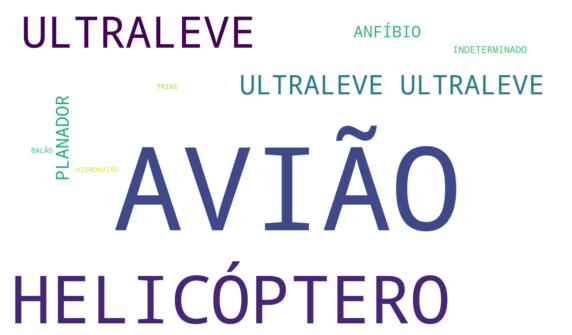

In [ ]:
# Gerando o grafico sem os eixos externos
fig, ax = plt.subplots( figsize=(10, 7) )
ax.imshow(aeronave_tipo, interpolation='bilinear')
ax.set_axis_off()

No WordCloud acima o **AVIÃO** sendo a maior palavra nessa nuvem de palavras, representa uma alta frequência de ocorrências de aviãos, conforme mostrado no gráfico acima com mais detalhes.

In [ ]:
#Cores para serem usadas nos gráficos personalizadas
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]

#Séries Temporais: Análises por Ano, Mês, Dia e Hora.

In [ ]:
#Extração dos dados de "Data" do Dataset.
acidentes['data'] = pd.to_datetime(acidentes['data'])
acidentes['Mes'] = acidentes['data'].map(lambda x: x.month)
acidentes['Dia'] = acidentes['data'].map(lambda x: x.day)

In [ ]:
data = acidentes['data'] = pd.to_datetime(acidentes['data'])
volume = acidentes.shape[0]

In [ ]:
ocorrencias_por_mes = Counter(acidentes['Mes'])
meses = (list(ocorrencias_por_mes.keys()))
ocorrencia_mes = (list(ocorrencias_por_mes.values()))

In [ ]:
ocorrencias_por_data = Counter(acidentes['data'])

In [ ]:
ocorrencias_por_dia = Counter(acidentes['Dia'])
dia = list(ocorrencias_por_dia.keys())
ocorrencia_dia = list(ocorrencias_por_dia.values())

In [ ]:
# Agrupamentos de Datas
agrupamento_ano = acidentes.groupby(acidentes['data'].dt.year)['codigo'].count()
agrupamento_mes = acidentes.groupby(acidentes['data'].dt.month)['codigo'].count()
agrupamento_dia = acidentes.groupby(acidentes['data'].dt.day)['codigo'].count()

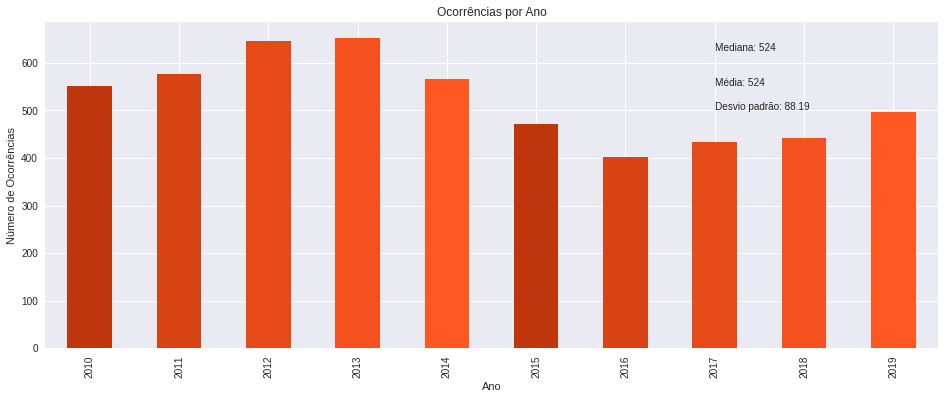


Representatividade - Anos
2013    12.46
2012    12.34
2011    10.99
2014    10.82
2010    10.53
2019     9.46
2015     8.99
2018     8.45
2017     8.28
2016     7.69
Name: data, dtype: float64


In [ ]:
#Ocorrências por Ano


agrupamento_ano.plot.bar(figsize=(16,6),color=random.choice(colors))
plt.style.use("seaborn")
plt.title("Ocorrências por Ano")
plt.text(7, 600.9, 'Mediana: %d\n'%(np.median(np.array(agrupamento_ano))),size=10)
plt.text(7, 550.9, 'Média: %d'%(np.mean(np.array(agrupamento_ano))),size=10)
plt.text(7, 500.9, 'Desvio padrão: %.2f'%(static.stdev(agrupamento_ano)),size=10)  
plt.xlabel("Ano")
plt.ylabel("Número de Ocorrências")
plt.grid(True,color='white')


plt.show()

print('\nRepresentatividade - Anos')
percentual_ano = round((acidentes.data.dt.year.value_counts() / acidentes.shape[0])*100.,2)

print(percentual_ano)


**Ao analisar o gráfico acima podemos tirar algumas conclusões.**
*   O Ano de `2013` é o **maior** em ocorrências com **12,46%**.
*   O Ano de `2016` é o **menor** em ocorrências com **7,69%**.

*  Média  de **524**, Desvio padrão de **88,19** e Mediana de **524** ocorrências de `2010` até `2017`. `Nota-se também uma tendência de crescimento a partir do ano de 2017`.

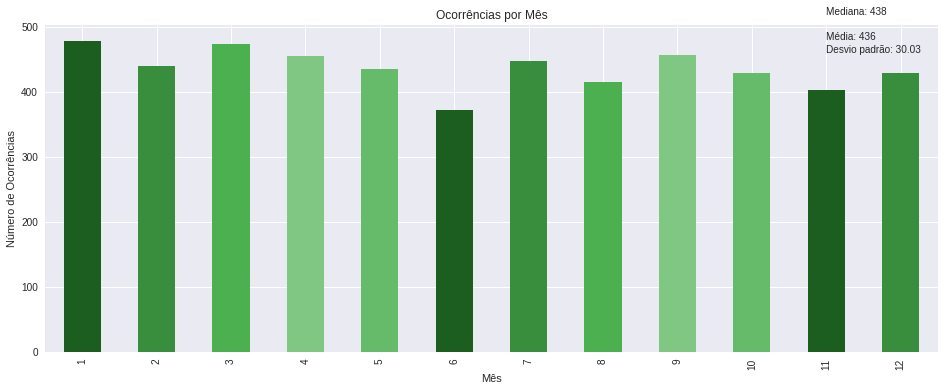


Representatividade - Meses
1     9.14
3     9.04
9     8.74
4     8.70
7     8.55
2     8.41
5     8.32
10    8.20
12    8.18
8     7.92
11    7.69
6     7.12
Name: data, dtype: float64


In [ ]:
#Ocorrências por Mês


agrupamento_mes.plot.bar(figsize=(16,6),color=random.choice(colors))
plt.style.use("seaborn")
plt.title("Ocorrências por Mês")
plt.text(10, 500.9, 'Mediana: %d\n'%(np.median(np.array(agrupamento_mes))),size=10)
plt.text(10, 480.9, 'Média: %d'%(np.mean(np.array(agrupamento_mes))),size=10)
plt.text(10, 460.9, 'Desvio padrão: %.2f'%(static.stdev(agrupamento_mes)),size=10)  
plt.xlabel("Mês")
plt.ylabel("Número de Ocorrências")
plt.grid(True,color='white')


plt.show()

print('\nRepresentatividade - Meses')
percentual_mes = round((acidentes.data.dt.month.value_counts() / acidentes.shape[0])*100.,2)

print(percentual_mes)


**Vendo pelo prisma de Meses, também podemos chegar a algumas conclusões.**
*   O mês de `Janeiro` é o **maior** em ocorrências com **9,14%** de representatividade.
*   O mês de `Junho` é o **menor** em ocorrências com **7,12%** de representatividade.

*  Média  de **436** ocorrências onde Janeiro obtém o maior volume sendo um mês com alto volume de viagens, Junho com menos ocorrências obtém o menor volume de viagens .

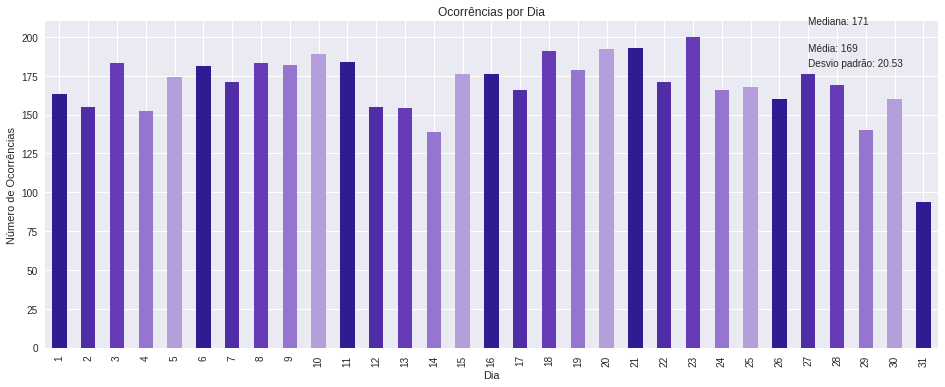


Representatividade - Dias
23    3.82
21    3.68
20    3.66
18    3.64
10    3.61
11    3.51
3     3.49
8     3.49
9     3.47
6     3.45
19    3.41
15    3.36
16    3.36
27    3.36
5     3.32
7     3.26
22    3.26
28    3.22
25    3.20
24    3.17
17    3.17
1     3.11
30    3.05
26    3.05
12    2.96
2     2.96
13    2.94
4     2.90
29    2.67
14    2.65
31    1.79
Name: data, dtype: float64


In [ ]:
#Ocorrências por Dia
agrupamento_dia.plot.bar(figsize=(16,6),color=random.choice(colors))
plt.style.use("seaborn")
plt.title("Ocorrências por Dia")
plt.text(26, 200.9, 'Mediana: %d\n'%(np.median(np.array(agrupamento_dia))),size=10)
plt.text(26, 190.9, 'Média: %d'%(np.mean(np.array(agrupamento_dia))),size=10)
plt.text(26, 180.9, 'Desvio padrão: %.2f'%(static.stdev(agrupamento_dia)),size=10) 
plt.xlabel("Dia")
plt.ylabel("Número de Ocorrências")
plt.grid(True,color='white')

plt.show()


print('\nRepresentatividade - Dias')
percentual_dia = round((acidentes.data.dt.day.value_counts() / acidentes.shape[0])*100.,2)

print(percentual_dia)


**Vendo pelo prisma de Dias, temos os seguintes insights.**
*   Dia `23` é o **maior** em ocorrências.
*   Dia `31` é o **menor** em ocorrências.

*  Média  de **169** ocorrências.

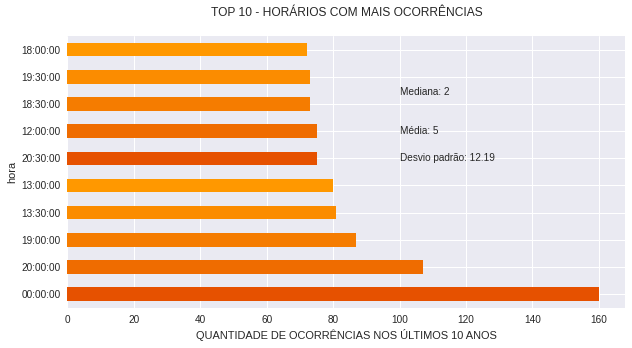

hora
00:00:00    160
20:00:00    107
19:00:00     87
13:30:00     81
13:00:00     80
20:30:00     75
12:00:00     75
18:30:00     73
19:30:00     73
18:00:00     72
Name: codigo, dtype: int64

In [ ]:
#Agrupamento por Horas
agrupamento_hora = acidentes.groupby('hora')['codigo'].count().sort_values(ascending = False)

agrupamento_hora.head(10).plot(kind='barh', figsize=(10,5), color=random.choice(colors), grid=True)

plt.title('TOP 10 - HORÁRIOS COM MAIS OCORRÊNCIAS\n')
plt.text(100, 6.9, 'Mediana: %d\n'%(np.median(np.array(agrupamento_hora))),size=10)
plt.text(100, 5.9, 'Média: %d'%(np.mean(np.array(agrupamento_hora))),size=10)
plt.text(100, 4.9, 'Desvio padrão: %.2f'%(static.stdev(agrupamento_hora)),size=10) 
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 10 ANOS')
plt.show()


agrupamento_hora.head(10)



**Vendo pelo Prisma de Hora:** Nota-se na análise acima que a hora que mais aconteceu ocorrências **(160)** foi `00:00:`.

A média de ocorrências por hora foi de **5**.

A quantidade de ocorrências em períodos noturnos está relacionada a visibilidade do período.

#Análise por Descrições de Ocorrências

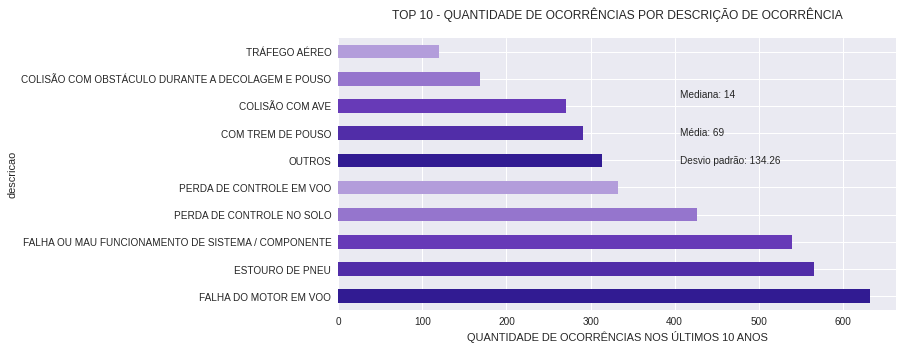


Representatividade - Descrições
FALHA DO MOTOR EM VOO                                 12.06
ESTOURO DE PNEU                                       10.80
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE    10.30
PERDA DE CONTROLE NO SOLO                              8.15
PERDA DE CONTROLE EM VOO                               6.35
                                                      ...  
HIPÓXIA                                                0.02
CAUSADO POR RICOCHETE                                  0.02
IMC NÃO INTENCIONAL                                    0.02
PERDA DE SEPARAÇÃO / COLISÃO EM VOO                    0.02
EXPLOSÃO                                               0.02
Name: descricao, Length: 75, dtype: float64


In [ ]:
ocorrencias_descricao = acidentes.groupby('descricao')['codigo'].count().sort_values(ascending = False)
ocorrencias_descricao.head(10).plot(kind='barh', figsize=(10,5), color=random.choice(colors), grid=True)

plt.title('TOP 10 - QUANTIDADE DE OCORRÊNCIAS POR DESCRIÇÃO DE OCORRÊNCIA\n')
plt.text(406, 6.9, 'Mediana: %d\n'%(np.median(np.array(ocorrencias_descricao))),size=10)
plt.text(406, 5.9, 'Média: %d'%(np.mean(np.array(ocorrencias_descricao))),size=10)
plt.text(406, 4.9, 'Desvio padrão: %.2f'%(static.stdev(ocorrencias_descricao)),size=10) 
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 10 ANOS')
plt.show()

print('\nRepresentatividade - Descrições')
percentual_descricao = round((acidentes.descricao.value_counts() / acidentes.shape[0])*100.,2)

print(percentual_descricao)

Como é possível analisar o gráfico acima, a **Falha de Motor** em voo seguida de **Estouro do Pneu** e **Falha ou Mau Funcionamento do Sistema/Componente**
obtém a maior incidência na aviação civil brasileira e concentram mais de 30% do total de acidentes no período de `(2010-2019)`. 

Com uma média de **69** ocorrências no período.


#Análise Por Quantidade de Motor das Aeronaves

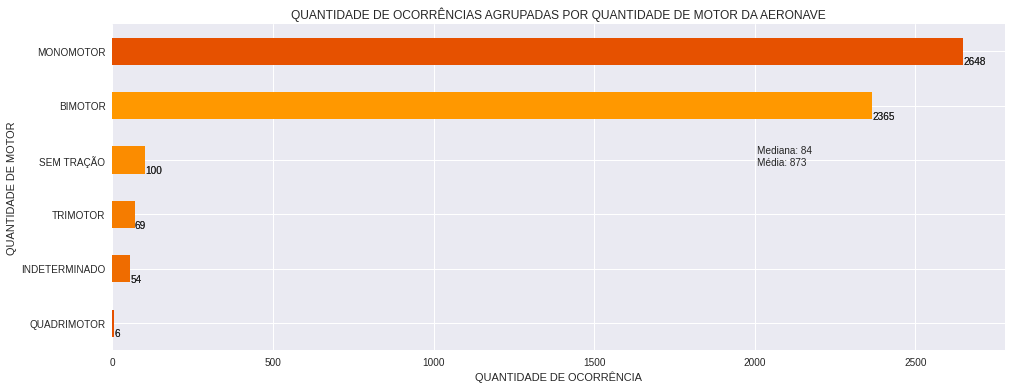


Representatividade - Quantidade Motor
MONOMOTOR        50.52
BIMOTOR          45.12
SEM TRAÇÃO        1.91
TRIMOTOR          1.32
INDETERMINADO     1.03
QUADRIMOTOR       0.11
Name: aeronave_motor_quantidade, dtype: float64


In [ ]:

ocorrencias_motor_quantidade = acidentes.groupby('aeronave_motor_quantidade')['codigo'].count().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(16,6))
ax = acidentes.groupby('aeronave_motor_quantidade')['codigo'].count().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(16,6))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.0))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR QUANTIDADE DE MOTOR DA AERONAVE')
plt.text(2006, 2.9, 'Mediana: %d\n'%(np.median(np.array(acidentes.aeronave_motor_quantidade.value_counts()))),size=10)
plt.text(2006, 2.9, 'Média: %d'%(np.mean(np.array(acidentes.aeronave_motor_quantidade.value_counts()))),size=10)

plt.ylabel('QUANTIDADE DE MOTOR')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

print('\nRepresentatividade - Quantidade Motor')
percentual_motor = round((acidentes.aeronave_motor_quantidade.value_counts() / acidentes.shape[0])*100.,2)

print(percentual_motor)


Nota-se que a quantidade de motor mais frequente de ocorrências neste período foi a `Monomotor` que possui **50,52%** dos casos. 

O tipo de motor com menor frequência é o `Quadrimotor` com apenas **6** ocorrências.
Média de ocorrências por tipo de motor é de **873** e mediana de **84**. 

#Análise por Tipo de Motor das Aeronaves.

In [ ]:
motor_tipo = Counter(acidentes['motor_tipo'])
fase_motor_tipo = sorted(motor_tipo, key = motor_tipo.get, reverse = True)
contador_motor_tipo = sorted(list(motor_tipo.values()), reverse = True)

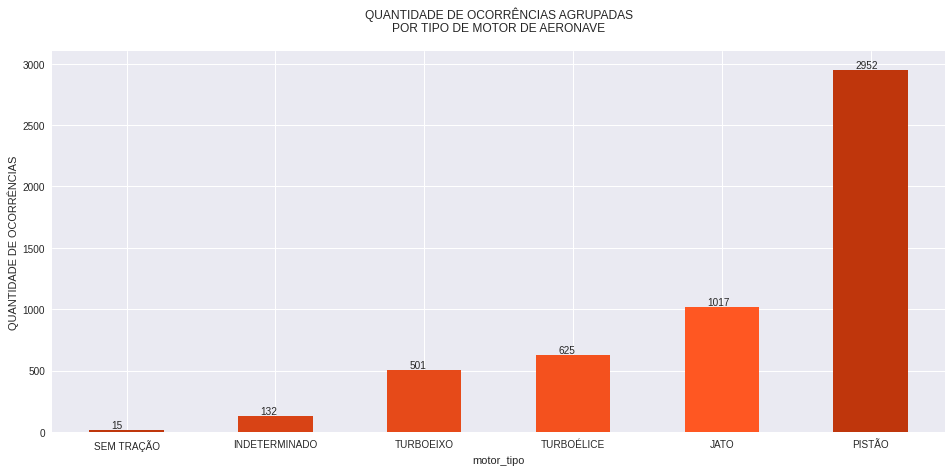

Mediana: 563
Média: 873
Desvio padrão: 1079.64

Representatividade - Tipo de Motor
PISTÃO           56.31
JATO             19.40
TURBOÉLICE       11.92
TURBOEIXO         9.56
INDETERMINADO     2.52
SEM TRAÇÃO        0.29
Name: motor_tipo, dtype: float64


In [ ]:
ax1 = acidentes.groupby('motor_tipo')['codigo'].count().sort_values().plot(kind='bar', color=random.choice(colors), figsize=(16,7))

for p in ax1.patches:
    b=p.get_bbox()
    ax1.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS\nPOR TIPO DE MOTOR DE AERONAVE\n')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

print('Mediana: %d'%(np.median(np.array(contador_motor_tipo))))
print('Média: %d'%(np.mean(np.array(contador_motor_tipo))))
print('Desvio padrão: %.2f'%(static.stdev(contador_motor_tipo)))

print('\nRepresentatividade - Tipo de Motor')
percentual_motor_tipo = round((acidentes.motor_tipo.value_counts() / acidentes.shape[0])*100.,2)

print(percentual_motor_tipo)

Nota-se na análise acimda que o tipo de motor mais frequente nas ocorrências foi a `PISTÃO` com **56,31%** de representatividade.

O tipo de motor com menor frequência é o `SEM TRAÇÃO` com **0,29%**.

A média de ocorrências por tipo de motor foi de **563**.

O desvio padrão é alto **1079.64** por conta da diferença nos números de ocorrência da análise tipo de motor x ocorrências.

##Word Cloud - Tipo de Motor das Aeronaves

In [ ]:
motor_tipo = " ".join(s for s in acidentes['motor_tipo'])

In [ ]:
# Gerando a nuvem de palavras
motor_tipo = WordCloud(
    background_color='black',
    width=1565,
    height=1000).generate(motor_tipo)

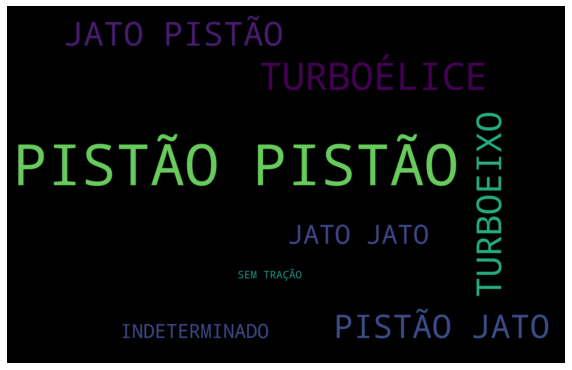

In [ ]:
# Gerando o grafico sem os eixos externos
fig, ax = plt.subplots( figsize=(10, 7) )
ax.imshow( motor_tipo, interpolation='bilinear')
ax.set_axis_off()

Como podemos ver na coluna **[motor_tipo]** as palavras maiores aparecem com maior frequência sendo o **PISTÃO** e **JATO**. Corriqueiramente os aviões com esses motores são os que tem o maior numero de ocorrências, bem como reportado nas análises das células **56 e 57.**

#Análise por Fabricantes das Aeronaves

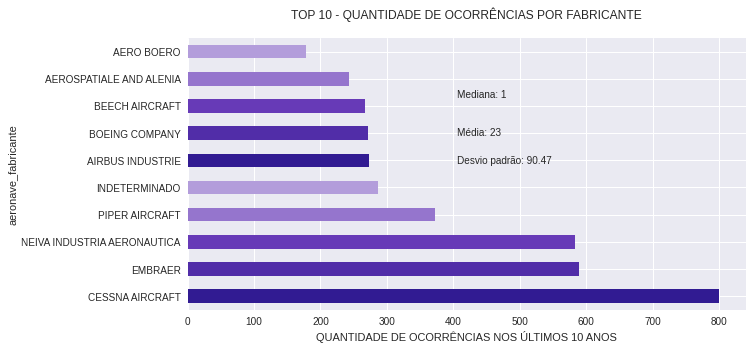


Representatividade - Fabricantes
CESSNA AIRCRAFT                          15.26
EMBRAER                                  11.24
NEIVA INDUSTRIA AERONAUTICA              11.12
PIPER AIRCRAFT                            7.12
INDETERMINADO                             5.46
                                         ...  
CLINICA MEDICA PRIETO & ANTUNES LTDA.     0.02
ECLIPSE AEROSPACE                         0.02
ROBERT MOHR                               0.02
MARIO CARLOS CARDOSO                      0.02
MARCO AURELIO M. DE SOUSA                 0.02
Name: aeronave_fabricante, Length: 223, dtype: float64


In [ ]:
ocorrencias_fabricante = acidentes.groupby('aeronave_fabricante')['codigo'].count().sort_values(ascending = False)
ocorrencias_fabricante.head(10).plot(kind='barh', figsize=(10,5), color=random.choice(colors), grid=True)

plt.title('TOP 10 - QUANTIDADE DE OCORRÊNCIAS POR FABRICANTE\n')
plt.text(406, 6.9, 'Mediana: %d\n'%(np.median(np.array(ocorrencias_fabricante))),size=10)
plt.text(406, 5.9, 'Média: %d'%(np.mean(np.array(ocorrencias_fabricante))),size=10)
plt.text(406, 4.9, 'Desvio padrão: %.2f'%(static.stdev(ocorrencias_fabricante)),size=10) 
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 10 ANOS')
plt.show()

print('\nRepresentatividade - Fabricantes')
percentual_fabricantes = round((acidentes.aeronave_fabricante.value_counts() / acidentes.shape[0])*100.,2)

print(percentual_fabricantes)

Nota-se na análise acima que a fabricante mais frequente nas ocorrências é a `CESSNA AIRCRAFT` com **15,26%** de representatividade, por conta do alto volume de aeronaves em atividade.


A média de ocorrência por fabricante foi de **23** no período de `(2010-2019)`.


#Análise de Status de Liberação das Aeronaves

SIM              2687
INDETERMINADO    2419
NÃO               136
Name: aeronave_liberada, dtype: int64


Text(0.5, 0.98, 'Aeronave liberada')

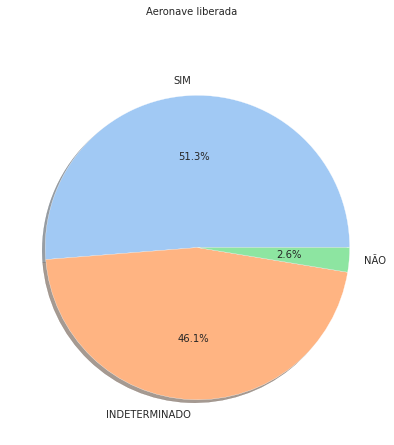

In [ ]:
race= acidentes['aeronave_liberada'].value_counts()
print(race)
from IPython.core.pylabtools import figsize
sns.set_palette("pastel")
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(7,7), sharex=True)

labels = race.index


plt.pie(x = race, labels = labels, autopct='%1.1f%%', shadow = True)

plt.suptitle('Aeronave liberada', size = 10)

Analisando o gráfico podemos notar que a maior parte das liberações das aeronaves tiveram seu status como **SIM**, representando **51,63%** na totalidade, seguido do status **INDETERMINADO** com **46,1%**, e com o menor número segue o status **NÃO** com apenas **2,6%**.


#Análise de Ocorrências com Saída na Pista

NÃO    4784
SIM     458
Name: ocorrencia_saida_pista, dtype: int64


Text(0.5, 0.98, 'Ocorrência com a saida na pista')

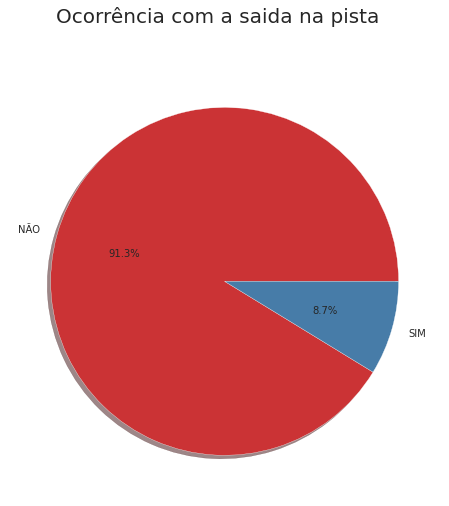

In [ ]:
race= acidentes['ocorrencia_saida_pista'].value_counts()
print(race)
from IPython.core.pylabtools import figsize
sns.set_palette("Set1", 8, .75)
sns.set_style("white")


f, ax = plt.subplots(figsize=(8,8 ), sharex=True)
labels = race.index


plt.pie(x = race, labels = labels, autopct='%1.1f%%', shadow = True)

plt.suptitle('Ocorrência com a saida na pista', size = 20)

Quanto a análise de ocorrências com saída na pista, podemos notar que a maior parte das ocorrências não acontecem na pista **91,13%** na totalidade, quanto as ocorrêncis que acontecem em pista são apenas **8,7%**.

#Análise de Ocorrências - Fase de Operação



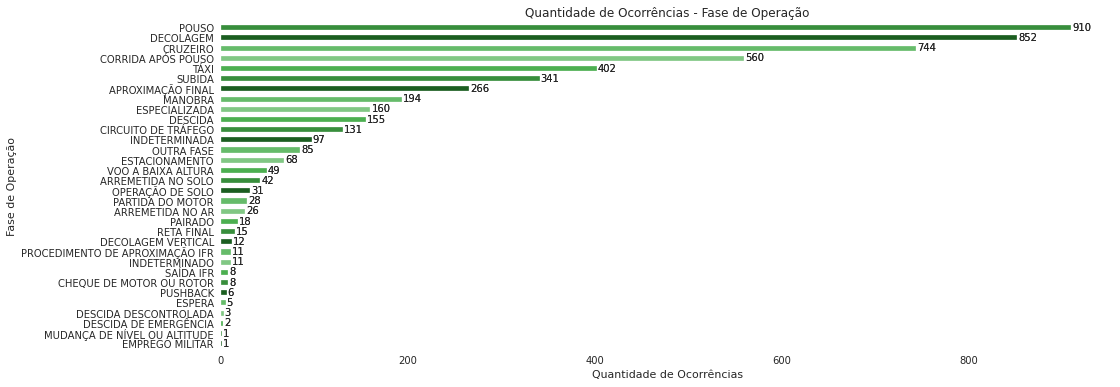


Percentual de Ocorrências - Fase de Operação
POUSO                              17.36
DECOLAGEM                          16.25
CRUZEIRO                           14.19
CORRIDA APÓS POUSO                 10.68
TÁXI                                7.67
SUBIDA                              6.51
APROXIMAÇÃO FINAL                   5.07
MANOBRA                             3.70
ESPECIALIZADA                       3.05
DESCIDA                             2.96
CIRCUITO DE TRÁFEGO                 2.50
INDETERMINADA                       1.85
OUTRA FASE                          1.62
ESTACIONAMENTO                      1.30
VOO A BAIXA ALTURA                  0.93
ARREMETIDA NO SOLO                  0.80
OPERAÇÃO DE SOLO                    0.59
PARTIDA DO MOTOR                    0.53
ARREMETIDA NO AR                    0.50
PAIRADO                             0.34
RETA FINAL                          0.29
DECOLAGEM VERTICAL                  0.23
PROCEDIMENTO DE APROXIMAÇÃO IFR     0.21
INDETERMINA

In [ ]:
ocorrencia_faseop = acidentes.groupby('aeronave_fase_operacao')['codigo'].count().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(16,6))
ax = acidentes.groupby('aeronave_fase_operacao')['codigo'].count().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(16,6))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.0))

plt.title('Quantidade de Ocorrências - Fase de Operação')
plt.ylabel('Fase de Operação')
plt.xlabel('Quantidade de Ocorrências')
plt.show()

print('\nPercentual de Ocorrências - Fase de Operação')
percentual_motor = round((acidentes.aeronave_fase_operacao.value_counts() / acidentes.shape[0])*100.,2)

print(percentual_motor)

Quando falamos em relação a fase de operação em que os aviões se encontravam no momento da ocorrência, o **Pouso** lidera o ranking com o total de **910 incidências**, representando **17,36%** da amostragem. Tendo como sucessor a **Decolagem** com um total de **852 incidências**, representando **16,25%**. 
Com esta análise constatamos que, os momentos mais cruciais para ocorrer algum tipo incidência seria durante o pouso e a decolagem da aeronave.

#Quebra de dados para Treinamento e Teste.

In [ ]:
from sklearn.model_selection import train_test_split

acidentes['tipo'] = acidentes['tipo'].replace('INCIDENTE', 0)
acidentes['tipo'] = acidentes['tipo'].replace('INCIDENTE GRAVE', 1)
acidentes['tipo'] = acidentes['tipo'].replace('ACIDENTE', 2)

acidentes['aeronave_liberada'] = acidentes['aeronave_liberada'].replace('INDETERMINADO', 0)
acidentes['aeronave_liberada'] = acidentes['aeronave_liberada'].replace('SIM', 1)
acidentes['aeronave_liberada'] = acidentes['aeronave_liberada'].replace('NÃO', 2)

acidentes['status_investigacao'] = acidentes['status_investigacao'].replace('INDETERMINADA', 0)
acidentes['status_investigacao'] = acidentes['status_investigacao'].replace('FINALIZADA', 1)
acidentes['status_investigacao'] = acidentes['status_investigacao'].replace('ATIVA', 2)

acidentes['aeronave_nivel_dano'] = acidentes['aeronave_nivel_dano'].replace('NENHUM', 0)
acidentes['aeronave_nivel_dano'] = acidentes['aeronave_nivel_dano'].replace('LEVE', 1)
acidentes['aeronave_nivel_dano'] = acidentes['aeronave_nivel_dano'].replace('SUBSTANCIAL', 2)
acidentes['aeronave_nivel_dano'] = acidentes['aeronave_nivel_dano'].replace('DESTRUÍDA', 3)
acidentes['aeronave_nivel_dano'] = acidentes['aeronave_nivel_dano'].replace('INDETERMINADO', 4)

acidentes['ocorrencia_saida_pista'] = acidentes['ocorrencia_saida_pista'].replace('NÃO', 0)
acidentes['ocorrencia_saida_pista'] = acidentes['ocorrencia_saida_pista'].replace('SIM', 1)


y = acidentes['aeronave_assentos']
x = acidentes.drop(['aeronave_assentos', "descricao","cidade", "estado", "hora",
                 "aeronave_tipo", "aeronave_pais_fabricante", "aeronave_fase_operacao",
                 "data", "aeronave_fabricante", 
                "aeronave_motor_quantidade", "motor_tipo"], axis = 1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)  
print(acidentes.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(5242, 21) (3669, 9) (1573, 9) (3669,) (1573,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
logreg_model = LinearRegression()

In [ ]:
logreg_model.fit(x_treino, y_treino)

LinearRegression()

#Verificando o Desempenho e Acurácia dos Testes.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = logreg_model.predict(x_teste)

print(f"Acurácia de Teste: ±{mean_absolute_error(y_teste, y_pred):1.0f}")

Acurácia de Teste: ±34


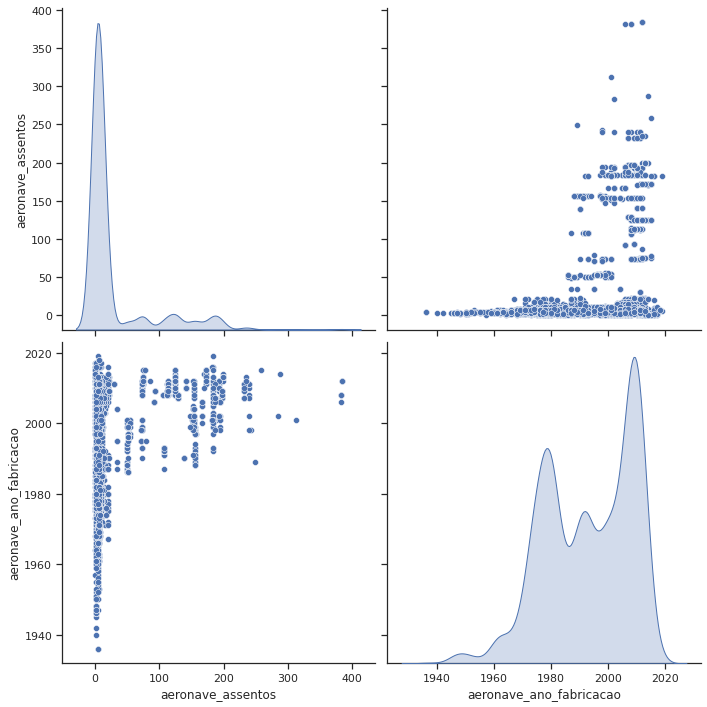

In [ ]:
df = acidentes.drop(acidentes.loc[acidentes['aeronave_ano_fabricacao']==0].index, inplace=True)
df = acidentes.drop(acidentes.loc[acidentes['aeronave_ano_fabricacao']==9999].index, inplace=True)

pair_col1 = ['aeronave_assentos', 'aeronave_ano_fabricacao']

sns.set_theme(style="ticks") # configuração

def pairplot(df, column_list):

    sns.pairplot(acidentes[column_list], kind='scatter', diag_kind='kde', 
                 height=5)

    plt.show()
    
pairplot(df, pair_col1)

In [ ]:

import statsmodels.api as sm

X = acidentes['aeronave_ano_fabricacao']
y = acidentes['aeronave_assentos']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      aeronave_assentos   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     726.7
Date:                Thu, 19 May 2022   Prob (F-statistic):          2.33e-149
Time:                        23:19:39   Log-Likelihood:                -26136.
No. Observations:                4896   AIC:                         5.228e+04
Df Residuals:                    4894   BIC:                         5.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

#1° Modelo de Regressão Linear com Variável "Quantidade de Assentos" comparando com o ano de fabricação das aeronaves.

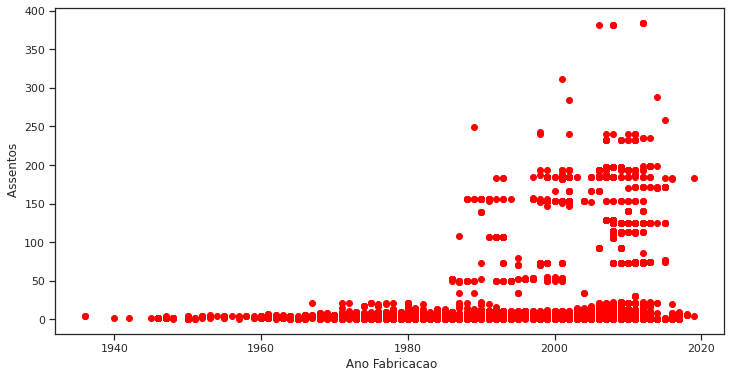

In [ ]:
#Analisando dispersão dos dados de ano de fabricação da aeronave e número de assentos.
plt.figure(figsize=(12,6))
plt.scatter(
    acidentes.aeronave_ano_fabricacao,
    acidentes.aeronave_assentos,
    c='red'
)

plt.xlabel(' Ano Fabricacao')
plt.ylabel(' Assentos')
plt.show()

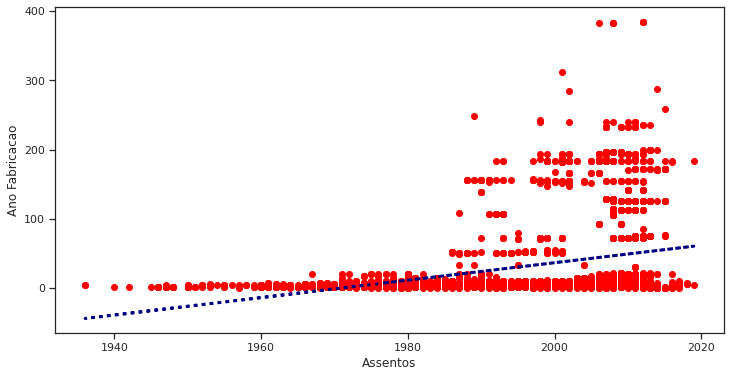

In [ ]:
# Traçando a linha de Regressão
X =  acidentes.aeronave_ano_fabricacao.values.reshape(-1,1)
y = acidentes.aeronave_assentos.values.reshape(-1,1)
reg = LinearRegression()

reg.fit(X, y)
previsoes = reg.predict(X)

plt.figure(figsize=(12,6))
plt.scatter(
    acidentes.aeronave_ano_fabricacao,
    acidentes.aeronave_assentos,
    c='red'
)

plt.plot(
    acidentes.aeronave_ano_fabricacao,
    previsoes,
    c='navy',
    linewidth=3,
    linestyle=':'
)

plt.xlabel('Assentos')
plt.ylabel('Ano Fabricacao')
plt.show()

Analisando a regressão acima onde nos mostra o eixo **X** como os **anos de fabricação das aeronaves** que se envolveram em algum incidente e o eixo **Y** mostra a **quantidade de assentos** das mesmas. É possível notar pelo gráfico que ao decorrer dos anos de fabricação das aeronaves os assentos foram aumentando conforme a evolulção do anos.


A linha pontilhada também mostra uma certa tendência de aumento de ocorrências com o passar dos anos.

É possível analisar também que existe mais ocorrências relacionadas as aeronaves com menores assentos, o que pode levar a pensar que a segurança deste tipo de aeronave pode ser falha em determinados casos (**Jornal Opção**,2021)



#2° Modelo de Regressão Linear com Variável "Quantidade de Assentos" comparando com a quantidade de incidentes.

In [ ]:
#Criação das variáveis para verificar uma regressão linear de número de assentos x incidentes
aeronave_assentos = Counter(acidentes['aeronave_assentos'])
fase_aeronave_assentos = sorted(aeronave_assentos, key = aeronave_assentos.get, reverse = True)
contador_aeronave_assentos = sorted(list(aeronave_assentos.values()), reverse = True)

In [ ]:
# Criação do DataFrame para incidentes x assentos
dataframe = pd.DataFrame()
dataframe['y'] = fase_aeronave_assentos
dataframe['x'] = contador_aeronave_assentos
x_values = dataframe[['x']]
y_values = dataframe[['y']]

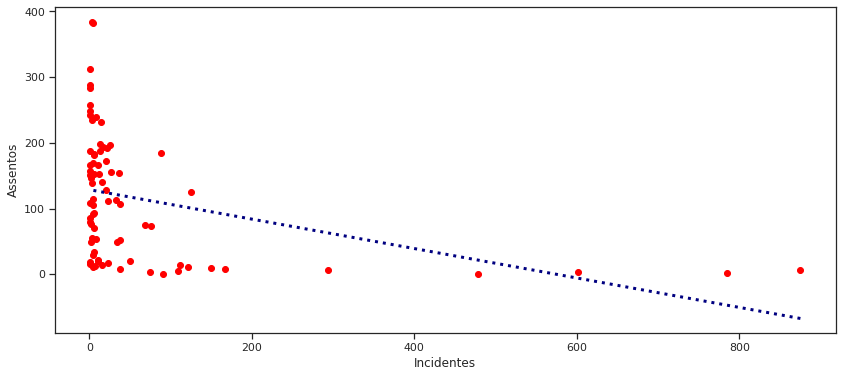

In [ ]:
#Plotando o gráfico da nova regressão linear
plt.figure(figsize=(14,6))
plt.scatter(dataframe['x'].values, dataframe['y'].values,c="red")

# traçando a linha da regressão com as variáveis do DataFrame
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)
# plotando um gráfico em cima do outro para visualizar.
plt.plot(dataframe['x'].values, reta(dataframe['x'].values),   c='navy',  linestyle=':', linewidth=3)
plt.xlabel('Incidentes')
plt.ylabel('Assentos')
plt.show()

Como já suspeitado na análise anterior, decidimos analisar também a quantidade de incidentes em relação aos assentos de aeronaves. Na análise acima temos o eixo **X** como a **quantidade de ocorrências de acidentes**, já o eixo **Y** nos motra a **quantidade de assentos das aeronaves.**

Analisando os dados é possível notar que **quanto menor o número de assentos, maior a quantidade de ocorrências de acidentes**, o que nos leva a conclusão de fato que a segurança das aeronaves com menos assentos são piores do que as aeronaves de grandes portes e a probabilidade das mesmas se envolverem em incidentes aéreos também é maior.

De forma resumida é possível notar no gráfico, que as aeronaves de grande porte com um grande número de assentos tem um número menor de incidentes aéreos, quando comparado com as aeronaves de pequeno porte com menos assentos.



#Considerações Finais

O objetivo deste trabalho foi realizar uma análise de dados de acidentes aéreos ocorridos no Brasil, no período de **(2010-2019)**, com o propósito de mostrar em gráficos e análises, as informações de incidentes aéreos em solo brasileiro.

O conteúdo dos dados usados para este trabalho, foi a base do CENIPA disponibilizada via GitHub pelo Professor Edson.

Os principais resultados e insights da análise foram:




*   Ao analisar as regiões percebemos que **Sudeste** é a mais afetada dentre todas as outras regiões. Analisando os estados, os dados nos mostram que o estado mais afetado é o de **SP** com 1239 incidentes registrados. Quando analisamos a cidade, a mais afetada é a do **Rio de Janeiro** com 293 incidentes registrados.


*   O tipo de aeroneva mais afetado são os **aviões**, com **4213** incidentes registrados tendo uma representatividade de **80,37%**, sendo a sua grande maioria aeronaves monomotores.


*  A principal falha encontrada são os **pistões de motor** com **56,31%** de representatividade dos problemas encontrados nas aeronaves, juntamente com a fabricante **Cessna Aircraft** com **15,26%** sendo a fabricante com o maior número de incidentes aéreos registrados. Analisando também a descrição destas ocorrências o motivo **"FALHA DE MOTOR EM VOO"** é o maior com **12,46%** de representatividade.


*  A grande maioria dos incidentes registrados são **incidentes leves** com **55,07%**, onde o mês com maior volume de incidentes é **Janeiro** e o ano de **2013** é o maior ano em números de incidentes com **12,46%** dos casos. Já a hora com maior número de incidentes é **"00:00:00"** com **160** incidentes registrados.







#Relatório Final

*  O trabalho apresentado acima procura apresentar de forma ilustrativa e gráfica, todas as informações que envolvem a aviação brasileira desse tipo de aeronave entre os anos de 2010 a 2019. É fundamental frizar que o conteúdo deste documento procurou priorizar somente aos dados coletados e produzidos pelo CENIPA (dados primários), não utlizando qualquer outro tipo de dados (terceiros) para complemento das análises.




*  O principal objetivo do documento é o compartilhamento de informações detalhadas sobre as ocorrências em aeronaves. O material é essencial para compor análises, estudos ou pesquisas referentes a incidentes aéreos em solo brasileiro.


*  Analisando os dados, observamos que os incidentes são diversos dentre aeronaves e descriminações do ocorrido. Ao tratar os dados nota-se que a maioria dos incidentes aéreos são de fatores externos, onde a grande maioria dos incidentes são classificados como leves ou quase nenhum dano apresentado a aeronave. 


*  Quando olhamos pelo prisma de incidentes aeronáuticos, todos os envolvidos são necessários e mobilizados para o apoio e investigação destes incidentes registrados, seguindo assim os protocolos e regras estabelecidas para segurança e investigação dos incidentes. Diante do dados e análises apresentados, é possível afirmar que os voos, analisando no geral, são seguros.


*  Finalizando, é possível estabelecer algumas caracteristicas analisando os incidentes como: os fatores que causaram os incidentes/ incidentes graves e acidente, podendo analisar também a média de de incidentes por ano, mês, hora, cidade, estado, região, tipos de aeronaves e nível de dano causado. O grande motivo apresentado em todas as ocorrências é **"FALHA DE MOTOR EM VOO"**, contrariando qualquer outro tipo de ocorrência como objetos durante a decolagem ou decolagem e o pouso, visto que os dados são poucos. Concluimos que o número de incidentes aéreos são menores, quando comparado ao número de aeronaves que decolam todos os dias em solo brasileiro durante o ano, porém ainda assim, os incidentes não são totalmente nulos.



#Referências Biliográficas



CENIPA, **FCA 58-1 Ocorrências Aeronáuticas**: Panorama Estatístico da Aviação Brasileira. 118p. Centro de Investigações e Prevenção de Acidentes Aeronáuticos. 2016.

EMC.**Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data.** Wiley, EMC Education Services, 1st Edition, 2015, 399 p.

MACHADO, Alysson. Biblioteca Matplotlib do Python:**Matplotlib é uma biblioteca para criação de gráficos e visualização de dados em geral**, São Paulo, v. 1, 31 mar. 2020.

NETO, José. **Introdução à Visualização de Dados:**São Paulo, v. 1, 3 mar. 2021.

COUTINHO, Thiago.**Numpy e Pandas estão entre as ferramentas mais poderosas de programação para quem trabalha com python e data science.** , São Paulo, v. 1, 25 jun. 2020.Disponível em: https://www.voitto.com.br/blog/artigo/principais-bibliotecas-python


G1, G1. **Brasileiros estão viajando mais de avião que de ônibus: Brasileiros estão viajando mais de avião que de ônibus.**São Paulo, v. 1, 9 ago. 2010. Disponível em: https://g1.globo.com/bom-dia-brasil/noticia/2010/08/brasileiros-estao-viajando-mais-de-aviao-que-de-onibus.html


MACHADO, Felipe. **Acidentes com aviões de pequeno porte são grande maioria no Brasil.**São Paulo, v. 1, 5 nov. 2021. Disponível em: https://www.bbc.com/portuguese/brasil-59185456

ANAC.RBAC - **Regulamentos Brasileiros da Aviação Civil:** São Paulo, v. 1, 10 mar. 2016.Disponível em: https://www.anac.gov.br/assuntos/legislacao/legislacao-1/rbha-e-rbac/rbac


TREZZI, Humberto. **O que as estatísticas sobre acidentes aéreos no Brasil apontam,** São Paulo, v. 1, 29 maio 2019. Disponível em: https://gauchazh.clicrbs.com.br/geral/noticia/2019/05/o-que-as-estatisticas-sobre-acidentes-aereos-no-brasil-apontam-cjw9h88vk00ua01qtkcbdbthe.html#:~:text=Perda%20de%20controle%20por%20parte,no%20pa%C3%ADs%20em%20uma%20d%C3%A9cada


GOV. **Três estudos sobre ocorrências aeronáuticas contribuem para segurança da aviação:,** São Paulo, v. 1, 14 jun. 2021. Disponível em: https://www.gov.br/anac/pt-br/noticias/2021/tres-estudos-sobre-ocorrencias-aeronauticas-contribuem-para-seguranca-da-aviacao


BASSETO, Murilo. **Por trás da “caixa-preta”: análise dos dados de acidentes aéreos no Brasil é referência mundial**: São Paulo, v. 1, 3 nov. 2021. Disponível em: https://aeroin.net/por-tras-da-caixa-preta-analise-dos-dados-de-acidentes-aereos-no-brasil-e-referencia-mundial/

DUARTE, Ana. **Desvendando a Regressão Linear:**, São Paulo, v. 1, 7 fev. 2021. Disponível em: https://www.alura.com.br/artigos/desvendando-a-regressao-linear?gclid=Cj0KCQjwvqeUBhCBARIsAOdt45ZWr0KchhXfcExJICU1tdGzUQDpr-IT82kJtFcutR3V8_ilcc8-_rEaAlVAEALw_wcB

PYTHON. **Collections — Tipos de dados do contêiner.** [S.I.], [?] ,Disponível em: https://docs.python.org/3/library/collections.html.


SCHÖNHOFEN, Ricardo D.. **Biblioteca Seaborn com o matplotlib.** Vooo, [S.I.],2017.Disponível em:https://www.vooo.pro/insights/biblioteca-seaborn-com-o-matplotlib/. 



FERREIRA, Carlos. **Cenipa divulga estudo de ocorrências de falha de motor em aviões bimotores leves:** São Paulo, v. 1, 14 fev. 2021. Disponível em: https://aeroin.net/cenipa-divulga-estudo-de-ocorrencias-de-falha-de-motor-em-avioes-bimotores-leves/

CRUZ, Débora. **Sudeste concentra 45% das viagens de avião feitas pelos brasileiros:** São Paulo, v. 1, 22 out. 2015. Disponível em: https://g1.globo.com/economia/noticia/2015/10/sudeste-concentra-45-das-viagens-de-aviao-feitas-pelos-brasileiros.html#:~:text=Sudeste%20concentra%2045%25%20das%20viagens,feitas%20pelos%20brasileiros%20%7C%20Economia%20%7C%20G1&text=Dado%20integra%20pesquisa%20sobre%20o,%2C%20Centro%2DOeste%20e%20Norte.
